In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../python/')
import NGC5533_functions as nf
import noordermeer as noord
import dataPython as dp

import astropy.units as u
import astropy.constants as c

import scipy.optimize as so
import scipy.special as ss
from scipy.integrate import quad

# Bulge model from Noordermeer's equations

The bulge model of NGC 5533 galaxy was fully derived from Noordermeer's "_Rotation curves of flattened Sersic bulges_" paper (from now on, "original paper"). <br><br>
In the first step, we defined the <b>gamma function</b> Noordermeer mentioned (pg.1361):<br> _"$r_0$ is the characteristic radius, which is related to the effective radius ($r_e$, the radius which encompasses 50 percent of the light) as $r_e$ = $b_{n}^{n}$ $r_0$ $b_n$ is a scaling constant that is defined such that it satisfies $\gamma$($b_n$, 2n) = $^1/_2$$\Gamma$(2n), with $\gamma$ and $\Gamma$ the incomplete and complete gamma functions, respectively."_ <br>There is a notebook on gamma functions in Anthony's notes: grav_project/notes/anthony/gamma_functions.ipynb that describes how the gamma function was derived. <br>
Next, the inner function was computed using $x$ and $m$ (Noordermeer's notation: $\kappa$ and $m$) as variables (eq.13). It's integral was evaluated over variable $\kappa$. Then, the outer ingral was evaluated over the variable $m$. Calculating the double integral resulted in the velocity squared function, so the square root of this function was plotted. See below.

## Plot of bulge model

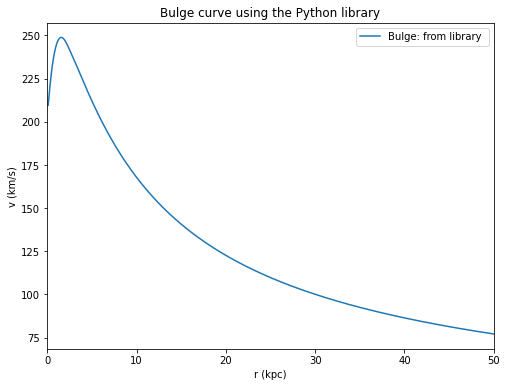

In [2]:
radius = np.linspace(0.1,50,500)
plt.figure(figsize=(8,6))
plt.plot(radius,nf.b_v(radius,load=True,path='../fitting/'),label='Bulge: from library ')
plt.xlabel('r (kpc)')
plt.ylabel('v (km/s)')
plt.xlim(0,50)
plt.title("Bulge curve using the Python library")
plt.legend()
plt.show()

## Parameters

The parameters of NGC 5533 found for the bulge are listed below.<br><br>

Noordermeer asserts in his original paper about NGC 5533, _"Its rotation curve was measured from a combination of optical spectroscopic data and HI observations by Noordermeer et al. (2007). R-band photometry for this galaxy was presented by Noordermeer & van der Hulst (2007), as well as a detailed study of the properties of its bulge and disc"_ (pg.1361). <br>Noordermeer et al. (2007): _The stellar mass distribution in early-type disc galaxies: surface photometry and bulge–disc decompositions_ <br>
Noordermeer & van der Hulst (2007): _The mass distribution in early-type disc galaxies: declining rotation curves and correlations with optical properties_.

<b>Concentration parameter ($n$)</b>: as Noordermeer describes: _"$n$ is a concentration parameter that describes the curvature of the profile in a radiusmagnitude plot"_(pg.1361). In his original paper, he experiences with different values of $n$ but as mentioned earlier, he uses parameters from his other papers to plot the bulge. On pg.1500, Noordermeer's _The stellar mass distribution in early-type disc galaxies: surface photometry and bulge–disc decompositions_ paper lists $n$ = 2.7 for the  bulge concentration parameter of UGC 9133 galaxy (NGC 5533). <br><br>

<b>Intrinsic axis ratio ($q$)</b>: _"q [is] the intrinsic axis ratio of the bulge isodensity surfaces"_ (Noordermeer, original paper, pg.1360). This parameter describes how flat a galaxy appears. The eccentricity can be calculated from this parameter: $e$ = $\sqrt{1 - q^{2}}$. The _"The stellar mass distribution in early-type disc galaxies"_ paper and also the original paper mentions $q$ = 0.3 but the table of values in the same shows $q$ = 0.33 (could this be a type-o? and it is supposed to be just $q$ = 0.3?.. not a big deal but we want to be accurate.)
- q=0.3 is reported only to one significant figure, which would make it consistent with q=0.33 (reported to two significant figures, but equivalent at one). I don't know why the value of q is reported to different levels of precision between the text and the table, but the values are not inconsistent.
<br><br>

<b>Characteristic radius ($r_0$) and Effective radius ($r_e$)</b>: As described earlier, _"$r_0$ is the characteristic radius, which is related to the effective radius ($r_e$, the radius which encompasses 50 percent of the light) as $r_e$ = $b_{n}^{n}$ $r_0$ $b_n$ is a scaling constant that is defined such that it satisfies $\gamma$($b_n$, 2n) = $^1/_2$$\Gamma$(2n), with $\gamma$ and $\Gamma$ the incomplete and complete gamma functions, respectively."_<br>
$r_e$ is 9.9 arcsec in Noordermeer's _"The stellar mass distribution in early-type disc galaxies"_ paper, and was converted to kpc using $D$ = 54.3 Mpc for the distance to the galaxy. The calculated value is: 2.6 kpc (see calculation below). <br><br>
<b>Inclination angle ($i$)</b>: The inclination angle for NGC 5533 galaxy is $i$ = 52$^\circ$ in _The stellar mass distribution in early-type disc galaxies_ paper and $i$ = 53$^\circ$ in _The mass distribution in early-type disc galaxies_ paper.

<b>Mass-to-light ratio ($\Upsilon_b$)</b>: This value is from the original paper: $\Upsilon_b$ = 2.8 $M_\odot / L_\odot$

<b>Luminosity ($L_\odot$)</b>: I'm trying to figure out where we got the 3.27e10 value from. We might have just guessed this value. Noordermeer mentions on page 5 of his 2008 paper: "The effects of the seeing on the measured bulge parameters were corrected for, using the deconvolutions from Graham (2001)."
***Found some things in our old Disk velocity calculations.***
- L = 10^(0.4*(Mag_sun - Mag_absolute))
    - This was commented out.
- Mag_absolute = -22.02, Mag_Sun = 4.42
- Mag_absolute does not match M_B (-21.22) or M_R (-22.62) from Noordermeer's papers.
    - Manually using one of these values does not result in a match, either.

<b>Central surface brightness ($I_0$)</b>: The central surface brightness was explained by Noordermeer as: <br>
_"$I_0$ and $r_0$ scaled such that all bulges have equal total luminosity ($L_b$ = 5 × $10^9$ $L_\odot$) and
effective radius ($r_e$ = 1 kpc)."_ <br>
This resulted from the gamma function the following way in our code: $I_0 = L*root^{2n}/(r_e^2*2\pi n*gamma(2n))$. <br>


($L$ is luminosity, $gamma$ is the gamma function, $root$ is the root of the gamma function, $n$ is concentration parameter, $r_e$ is the effective radius.) <br> We found an equation in this paper that was referenced by Noordermeer: [_Graham: An investigation into the prominence of spiral galaxy bulges_](https://iopscience.iop.org/article/10.1086/318767/pdf) (pg.822/eq.3): <br>


$L_{tot} = \frac{n2\pi r^2_eI_ee^b}{(b_n)^{2n}}\Gamma(2n)$, where $I_0 = I_ee^b$.The calculation resulted in a central surface brightness of about 4.10e10 (units?). <br><br> 

<b>Gravitational constant ($G$)</b> was converted to $kpc \times (km/s)^{2}$ $/$ $solar$ $mass$ to match all other units. <br><br>

In [3]:
# Parameters

# Constants
n = 2.7                                     #concentration parameter 
q = 0.33                                    #intrinsic axis ratio (is this 0.3 instead?)
G = 4.30091e-6                              #gravitational constant (kpc/solar mass*(km/s)^2)
ups = 2.8                                   #mass-to-light ratio 
i = 52*(np.pi/180)                          #inclination angle

re = 2.6                                    #effective radius (kpc)
# this is how we calculated this value: calculating re (from arcsec to kpc)
re_arcsec = 9.9*u.arcsec                    #value given in Noordermeer's "The stellar mass distribution in early-type disc galaxies" paper                
D = 54.3 * u.Mpc
re_Mpc = (re_arcsec.to(u.degree)/(360 * u.degree)) * 2 * np.pi * D
re_kpc = re_Mpc.to(u.kpc)
print("Effective radius (re): {}.".format(re_kpc))

Effective radius (re): 2.606212905540533 kpc.


In [4]:
# Calculating luminosity
Mabs = -21.66                               # absolute magnitude of bulge (mag). Source: Noordermeer et al. (2007): The stellar mass distribution in early-type disc galaxies: surface photometry and bulge–disc decompositions
Sabs = 4.74                                 # absolute magnitude of the Sun (bolometric)  
L0 = 3.0128e28                              # zero point luminosity (in watts). Source: Wikipedia: Absolute magnitude
print(c.L_sun)
L0toLsun = L0/3.828e26
print(L0toLsun)

# Original guessed value
L_orig = 3.27e10 * c.L_sun
L_orig = L_orig.to(u.L_sun)
print("Luminosity of bulge (Original guessed value): {:.3e}.".format(L_orig))

# Noordermeer uses this in his original paper for Fig 3 but definitely not Fig 4.
L_bulge = 5e9                               # From Noordermeer's main paper
re_2 = 1.0                                  # From Noordermeer's main paper

# Wikipedia (using zero-point luminosity equation)
L_wiki = L0toLsun * c.L_sun * 10**(-0.4*Mabs)
L_wiki = L_wiki.to(u.L_sun)
print("Luminosity of bulge (Wikipedia - Zero point Luminosity): {:.3e}.".format(L_wiki))

# University of Texas, University of Tennesse equation
L_univ = 10**(0.4*(Sabs - Mabs)) * c.L_sun
L_univ = L_univ.to(u.L_sun)
print("Luminosity of bulge (University of Texas): {:.3e}.".format(L_univ))

  Name   = Nominal solar luminosity
  Value  = 3.828e+26
  Uncertainty  = 0.0
  Unit  = W
  Reference = IAU 2015 Resolution B 3
78.7042842215256
Luminosity of bulge (Original guessed value): 3.270e+10 solLum.
Luminosity of bulge (Wikipedia - Zero point Luminosity): 3.631e+10 solLum.
Luminosity of bulge (University of Texas): 3.631e+10 solLum.


In [5]:
# Bulge rotational velocity

# I am going to go through and line these up with the library NGC5533_functions.py. 
# They will be marked below the line with a comment [func(vars)] and then any additional comments
# -KCH

def v_bulge(L,re,n,G,q,ups,i):
    # gamma function
    f = lambda x: ss.gammainc(2*n,x)*ss.gamma(2*n)-0.5*ss.gamma(2*n)  #where exactly is this eq coming from? -> Anthony calculated the gamma function, see his notes about gamma function
    # [b_gammafunc(x,n=nc)] we are defining n outside of the function for this notebook.
    root = so.brentq(f,0,500000,rtol=0.000001,maxiter=100)            #come within 1% of exact root within 100 iterations
    # [b_root] identical
    bn = root 
    # [b_root] (rename)
    
    # calculating I0
    I0 = (L*(bn**(2*n)))/(((re**2)*2*np.pi*n)*ss.gamma(2*n))          #where exactly is this eq coming from? -> see notes above
    #[b_I0(n,re)] since n,re are constants in this notebook, there is no need to define I0 as a function.
    r0 = re/bn**n                                                     #eq in Noord (2008), section 2.2, paragraph 3, solved for r0
    #[b_r0(n,re)] n,re are constants -> no function. uses ** instead of np.power but these are functionally the same when not using arrays.
    print(I0)
    print(r0)

    # inner function
    f = lambda x,m: np.exp(-np.power(x/r0, (1/n)))*(np.power(x/r0, ((1/n)-1)))/(np.sqrt((x**2)-(m**2))); #previous f was only needed to define root so this should be ok
    # [f = lambda(x,m,n,re)] within b_innerintegral(m,n,re)
    
    # integrate inner function
    g = lambda m: quad(f, m, np.inf,args=(m,))[0]
    # [b_innerintegral(m,n,re)] just the "return" line
    
    # equations
    C = (4*G*q*ups*I0)/(r0*np.float(n))*(np.sqrt((np.sin(i)**2)+(1/(q**2))*(np.cos(i)**2)))
    # [C = lambda n,re] within b_vsquare
    e2 = 1-(q**2)
    # [e2] identical
    
    
    # plot range
    x = np.linspace(0.1,50,500)
    
    # integrate outer function
    h = lambda m,r: C*g(m)*(m**2)/(np.sqrt((r**2)-((m**2)*(e2))))
    #[h = lambda m,r,n,re] no functions of n,re -> variables get dropped from this version
    y = np.zeros(np.shape(x))
    for j,r in enumerate(x):
        hr = lambda m: h(m,r)
        # [h = lambda m,r,n,re] (rename)
        yr = quad(h, 0, r,args=(r,))[0]
        # [b_vsquare(r,n,re)] return line only
        y[j] = yr

    # velocity
    velocity = np.sqrt(y)
    # [b_v(r,n,re,args)] taking square root, not doing all of the saving/loading
    return velocity

***
## Equations

>__Luminosity__: <br>
    \begin{equation}
    I_b(\kappa) = I_0 \exp \left[-\left(\frac{\kappa}{r_0} \right)^{\frac{1}{n}}\right]
    \end{equation}
    <br>
>where:<br>
        $I_0$ = central surface brightness<br>
        $n$ = concentration parameter<br> 
        $r_0$ = characteristic radius (related to $r_e$)<br>
        $r_e$ = effective radius<br>
<br>
>__Gamma function__: <br>
from Noordermeer's paper<br>
    \begin{equation}
    \gamma(b_n,2n) = \frac{1}{2} \Gamma(2n)
    \end{equation}<br>
    \begin{equation}
    r_e = b_n^n r_0 b_n 
    \end{equation}<br>
from Anthony's calculations<br>
    \begin{equation}
    \gamma(n,u_e) = \frac{1}{2} \Gamma(n)
    \end{equation}<br>

>__Velocity__: <br>
    <font color="green">
    \begin{equation}
V_{B}^{2}(r) = C \int_{m=0}^{r} \left[\int_{\kappa=m}^{\infty} \frac {e^{-\left(\frac{\kappa}{r_0}\right)^{\frac{1}{n}}} \left(\frac{\kappa}{r_0}\right)^{\frac{1}{n}-1}} {\sqrt{\kappa^2-m^2}} d\kappa\right] \times \frac{m^{2}}{\sqrt{r^{2}-m^{2}e^{2}}} dm
    \end{equation}<br></font>
>where:<br>
    \begin{equation}
    C = \frac{4Gq\Upsilon_b I_0}{r_0n} \sqrt{sin^{2}i + \frac{1}{q^{2}} cos^{2}i}
    \end{equation}<br>
    \begin{equation}
    e = \sqrt{1-q^{2}}
    \end{equation}<br> 
        $\Upsilon_b$ = mass-to-light ratio<br>
        $e$ = eccentricity of the bulge<br>
        $q$ = intrinsic axis ratio<br> 
        $i$ = inclination angle<br> 
        $G$ = gravitational constant<br>
    <br>
***

## Comparison

We are comparing our calculated bulge curve using Noordermeer's equations to his published bulge curve (data was retrieved using DataThief) from his "_Rotation curves of flattened Sersic bulges_" paper. <br>
The rotation curve of the bulge component of NGC 5533 galaxy was calculated and plotted using Python. <font color="red"> <b> The resulting model closely resembles Noordermeer's bulge model. </b> </font>

In [6]:
# Calculating velocities with different luminosities
L_wiki = 3.612e10
v_bulge_wiki = v_bulge(L_wiki,re,n,G,q,ups,i)

L_univ = 3.945e10
v_bulge_univ = v_bulge(L_univ,re,n,G,q,ups,i)

L_guess = 3.27e10 #Definitely the one that's used in the library...
v_bulge_guess = v_bulge(L_guess,re,n,G,q,ups,i)

45315060732.23661
0.032457790309459424


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49

49492778125.324875
0.032457790309459424
41024432058.25408
0.032457790309459424


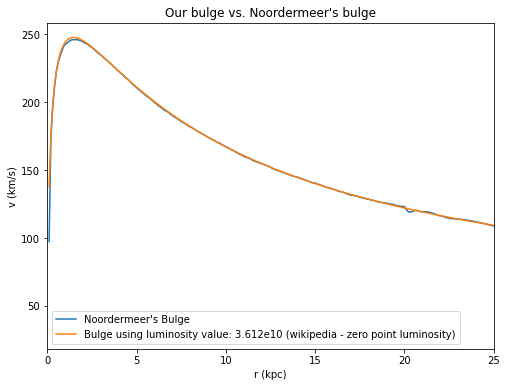

In [7]:
plt.figure(figsize=(8,6))
plt.plot(radius,noord.noord_bulge(radius),label="Noordermeer's Bulge")
#plt.plot(radius,nf.b_v(radius,load=False,path='../fitting/'),'.',label="Our bulge from the library, using guessed luminosity: 3.27e10")
#plt.plot(radius,v_bulge_guess,label="[Check] Bulge using luminosity value: 3.27e10 (guess)")
plt.plot(radius,v_bulge_wiki, label="Bulge using luminosity value: 3.612e10 (wikipedia - zero point luminosity)")
#plt.plot(radius,v_bulge_univ, label="Bulge using luminosity value: 3.945e10 (university - generic equation)")

plt.xlim(0,25)
plt.xlabel('r (kpc)')
plt.ylabel('v (km/s)')
plt.title("Our bulge vs. Noordermeer's bulge")
plt.legend()
plt.show()

../python\NGC5533_functions.py:240: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return si.quad(h, 0, r, args=(r,n,re))[0]
../python\NGC5533_functions.py:240: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return si.quad(h, 0, r, args=(r,n,re))[0]


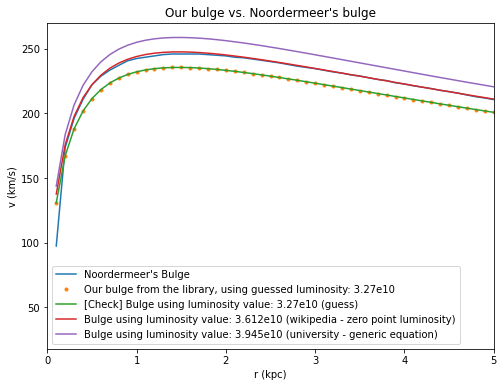

In [8]:
plt.figure(figsize=(8,6))
plt.plot(radius,noord.noord_bulge(radius),label="Noordermeer's Bulge")
plt.plot(radius,nf.b_v(radius,load=False,path='../fitting/'),'.',label="Our bulge from the library, using guessed luminosity: 3.27e10")
plt.plot(radius,v_bulge_guess,label="[Check] Bulge using luminosity value: 3.27e10 (guess)")
plt.plot(radius,v_bulge_wiki, label="Bulge using luminosity value: 3.612e10 (wikipedia - zero point luminosity)")
plt.plot(radius,v_bulge_univ, label="Bulge using luminosity value: 3.945e10 (university - generic equation)")

plt.xlim(0,5)
plt.xlabel('r (kpc)')
plt.ylabel('v (km/s)')
plt.title("Our bulge vs. Noordermeer's bulge")
plt.legend()
plt.show()

## Conclusion

Questions: <br>

 - How did we calculate $I_0$?

While I didn't replicate exactly $L$ = 3.27e10, the value of the luminosity that we got is much closer.  
We don't have a bolometric magnitude or luminosity, but it seems like Noordermeer is using R-band luminosities throughout